# Projected (versión Jose)
N2N (Noise2Noise) denoising del volumen epfl1. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen original (que nosotros consideraremos como "even") y $V_2$ es el volumen generado a partir de proyectar cada slice $z+1$ en la dimensión Z, sobre el slice $z$ (que será el volumen ("odd").

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/epfl1`.

## Creamos $V_2$
El volumen "odd".

File loaded successfully: /nas/vruiz/cryoCARE/epfl1/epfl1_subset1_float.mrc
Data shape (Z, Y, X): (150, 768, 1024)
Data type: float32
Voxel size (Å): (1.00, 1.00, 1.00)
Volume normalized to uint8 for OpenCV.


Projecting Slices:   0%|          | 0/149 [00:00<?, ?it/s]


Optical flow calculation and projection complete.


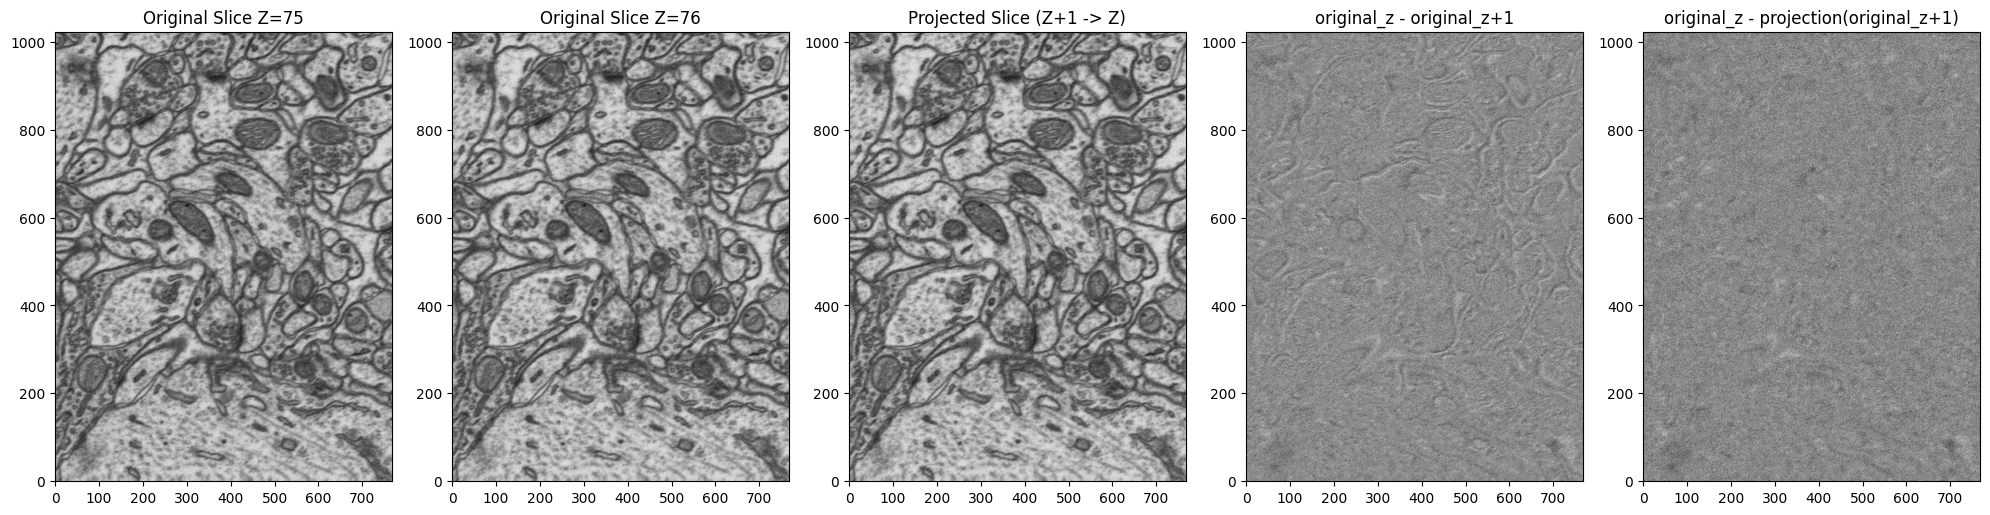

Writing /nas/vruiz/cryoCARE/epfl1/projected_volume.mrc
New MRC file '/nas/vruiz/cryoCARE/epfl1/projected_volume.mrc' was created successfully.
Data shape: (150, 768, 1024)
Voxel size: (0.99999976, 0.9999997, 1.)
Data type: float32
-rw-r----- 1 jupyter-vruiz jupyter-vruiz 471860224 oct  2 20:53 /nas/vruiz/cryoCARE/epfl1/projected_volume.mrc


In [1]:
%run project_vol__jose.ipynb

## Configuramos cryoCARE

In [2]:
%%writefile /nas/vruiz/cryoCARE/epfl1/train_data_config__projected.json
{
    "even": ["epfl1_subset1_float.mrc"],
    "odd": ["projected_volume.mrc"],
    "mask": [""],
    "patch_shape": [32, 32, 32],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./projected_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/epfl1/train_data_config__projected.json


In [3]:
%%bash
cd /nas/vruiz/cryoCARE/epfl1
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__projected.json

2025-10-02 20:53:12.974357: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(150, 768, 1024), sample_shape=[32, 32, 32]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 1829.86it/s]


## Entrenamos

In [4]:
%%writefile /nas/vruiz/cryoCARE/epfl1/train_config__projected.json
{
  "train_data": "./projected_data",
  "epochs": 150,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [0]
}

Overwriting /nas/vruiz/cryoCARE/epfl1/train_config__projected.json


In [5]:
%%bash
cd /nas/vruiz/cryoCARE/epfl1
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__projected.json

2025-10-02 20:53:18.474980: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-02 20:53:20.025952: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-02 20:53:20.026679: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-02 20:53:20.054897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-02 20:53:20.056948: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-02 20:53:20.057015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 0
GPU 0 successfully found
0 1
1 32
2 32
3 32
4 1
Epoch 1/150


2025-10-02 20:53:23.970681: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-02 20:53:25.739853: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-02 20:53:25.840163: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-02 20:53:27.048547: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-02 20:53:27.700409: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-02 20:53:46.729807: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
20

200/200 [==============================] - 76s 157ms/step - loss: 0.1585 - mse: 0.1585 - mae: 0.3140 - val_loss: 0.1133 - val_mse: 0.1133 - val_mae: 0.2667
Epoch 2/150
200/200 [==============================] - 8s 41ms/step - loss: 0.1141 - mse: 0.1141 - mae: 0.2676 - val_loss: 0.1101 - val_mse: 0.1101 - val_mae: 0.2629
Epoch 3/150
200/200 [==============================] - 8s 40ms/step - loss: 0.1111 - mse: 0.1111 - mae: 0.2641 - val_loss: 0.1095 - val_mse: 0.1095 - val_mae: 0.2622
Epoch 4/150
200/200 [==============================] - 8s 40ms/step - loss: 0.1100 - mse: 0.1100 - mae: 0.2628 - val_loss: 0.1081 - val_mse: 0.1081 - val_mae: 0.2607
Epoch 5/150
200/200 [==============================] - 8s 40ms/step - loss: 0.1097 - mse: 0.1097 - mae: 0.2624 - val_loss: 0.1074 - val_mse: 0.1074 - val_mae: 0.2598
Epoch 6/150
200/200 [==============================] - 8s 40ms/step - loss: 0.1092 - mse: 0.1092 - mae: 0.2619 - val_loss: 0.1056 - val_mse: 0.1056 - val_mae: 0.2576
Epoch 7/150
20

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/epfl1/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


## Inferimos

In [6]:
%%writefile /nas/vruiz/cryoCARE/epfl1/predict_config__projected.json
{
    "path": "./model.tar.gz",
    "even": ["epfl1_subset1_float.mrc"], 
    "odd": ["epfl1_subset1_float.mrc"],
    "n_tiles": [1,1,1],
    "output": "projected_denoised",
    "overwrite": "True",
    "gpu_id": [0, 1]
}

Overwriting /nas/vruiz/cryoCARE/epfl1/predict_config__projected.json


In [7]:
%%bash
cd /nas/vruiz/cryoCARE/epfl1
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__projected.json || true

/nas/vruiz/cryoCARE/epfl1


2025-10-02 21:14:55.509995: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-02 21:15:00.769049: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-02 21:15:00.769760: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-02 21:15:00.794176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-02 21:15:00.796218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-02 21:15:00.796291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 0
GPU 0 successfully found
Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(152, 768, 1024, 1)
Out of memory, retrying with n_tiles = (1, 1, 2, 1)
Out of memory, retrying with n_tiles = (1, 2, 2, 1)


100%|██████████| 4/4 [00:11<00:00,  2.93s/it]    
Traceback (most recent call last):
  File "/home/jupyter-vruiz/envs/cryoCARE/bin/cryoCARE_predict.py", line 175, in <module>
    main()
  File "/home/jupyter-vruiz/envs/cryoCARE/bin/cryoCARE_predict.py", line 154, in main
    denoise(config, mean, std, even=even, odd=odd, output_file=out_filename)
  File "/home/jupyter-vruiz/envs/cryoCARE/bin/cryoCARE_predict.py", line 96, in denoise
    new_label = np.concatenate((even.header[l][1:-1], np.array([
  File "<__array_function__ internals>", line 5, in concatenate
UnicodeDecodeError: 'ascii' codec can't decode byte 0x81 in position 3: ordinal not in range(128)


In [8]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [9]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [10]:
mrc_file_path = '/nas/vruiz/cryoCARE/epfl1/epfl1_subset1_float.mrc'
original_volume = read_MRC(mrc_file_path)

In [11]:
mrc_file_path = '/nas/vruiz/cryoCARE/epfl1/projected_denoised/epfl1_subset1_float.mrc'
denoised_volume = read_MRC(mrc_file_path)

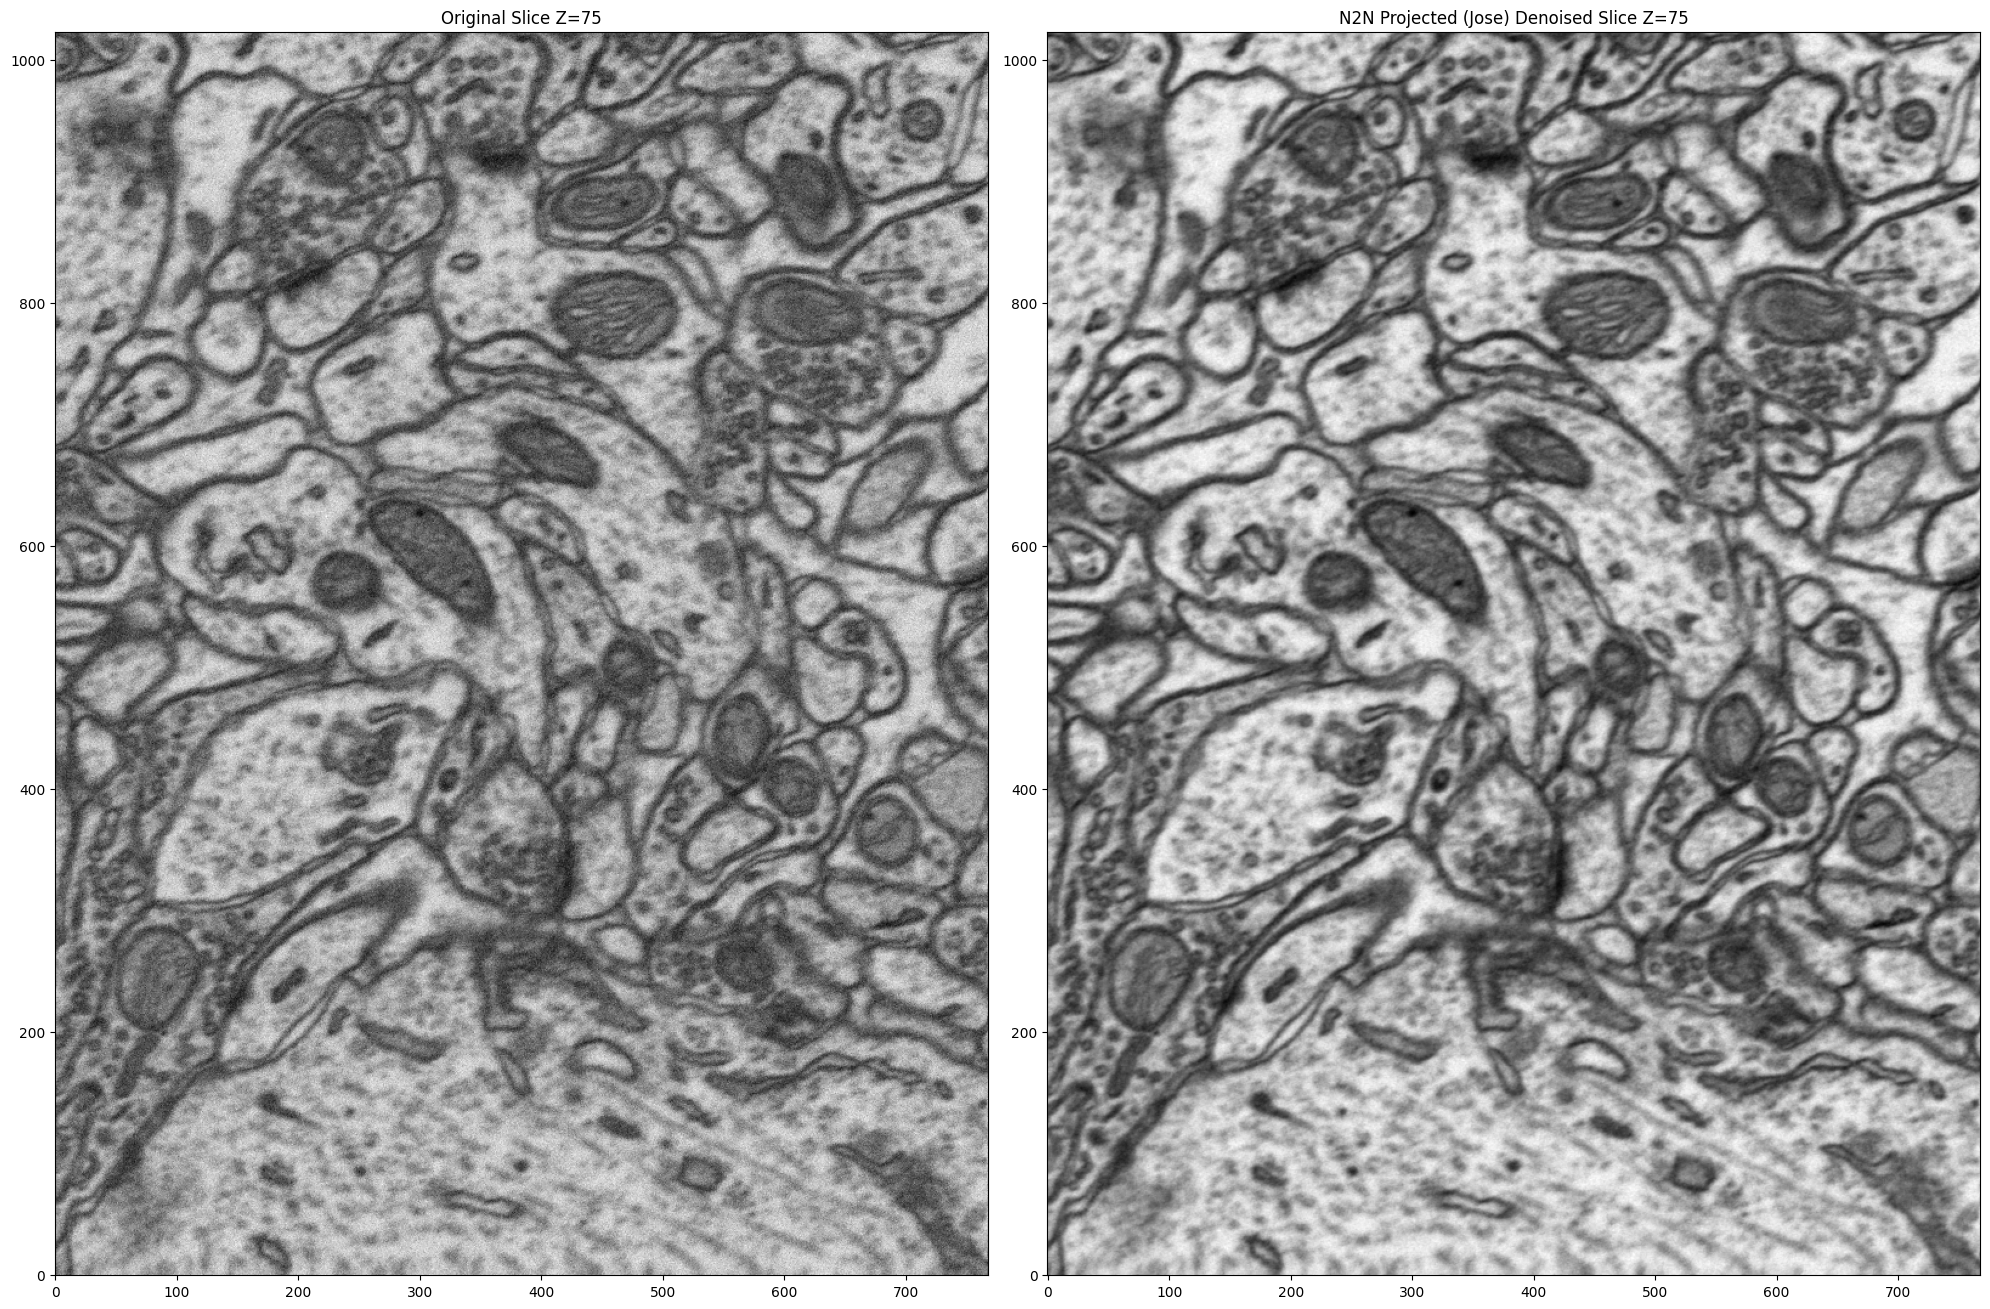

In [12]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Projected (Jose) Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [1]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-c5e4e_q6/self-fourier-shell-correlation_16f4e3f561ba49c68ceb969b60a92b1d
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-c5e4e_q6/self-fourier-shell-correlation_16f4e3f561ba49c68ceb969b60a92b1d
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

  Cloning https://github.com/vicente-gonzalez-ruiz/shuffling to /tmp/pip-install-38zfblbs/shuffling_170034c155864fe6bc7b15468c58d997
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/shuffling /tmp/pip-install-38zfblbs/shuffling_170034c155864fe6bc7b15468c58d997
  Resolved https://github.com/vicente-gonzalez-ruiz/shuffling to commit 0710ed80bd40725b8fd116352c8e58a97f96528b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation to /tmp/pip-install-xp1w2039/motion-estimation_fa32d8eaa1e448eebdc5fb77bc9d37ae
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-xp1w2039/motion-estimation_fa32d8eaa1e448eebdc5fb77bc9d37ae
  Resolved https://github.com/vicente-gonzalez-ruiz/motion_estimation to commit 1f5e6bbf388db38c054f3ae38b4e82f074f7b493
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [7]:
import mrcfile

In [8]:
v1 = mrcfile.read("/nas/vruiz/cryoCARE/epfl1/epfl1_subset1_float.mrc")

In [9]:
v2 = mrcfile.read("/nas/vruiz/cryoCARE/epfl1/projected_volume.mrc")

In [11]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(v1, v2, shell_thickness=0.01)

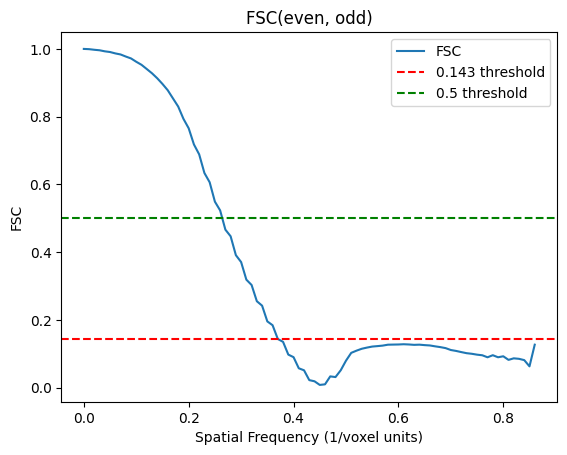

In [12]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")